In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2) #two qubit quantum register

In [3]:
cr = ClassicalRegister(2) #two qubit classical register

In [4]:
circuit = QuantumCircuit(qr, cr)

In [5]:
%matplotlib inline

In [6]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [7]:
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])

In [8]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [9]:
circuit.measure(qr, cr)

In [10]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [11]:
simulator = Aer.get_backend('qasm_simulator')

In [12]:
execute(circuit, backend = simulator)

In [13]:
result = execute(circuit, backend = simulator).result()

In [14]:
from qiskit.tools.visualization import plot_histogram

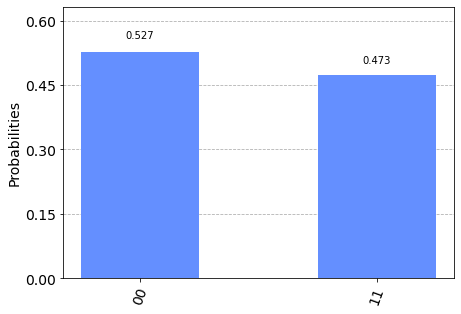

In [15]:
plot_histogram(result.get_counts(circuit))

Job Status: job has successfully run


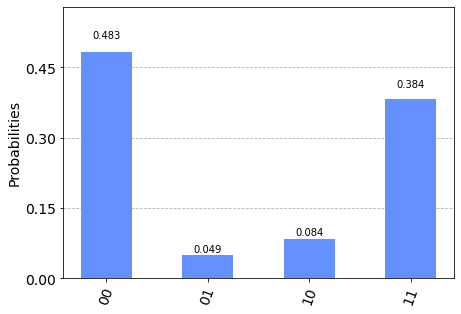

In [16]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(circuit))